# Examine samples with high PAO1 and PA14 accessory expression

Based on the scatterplot in the [previous notebook](cluster_by_accessory_gene.ipynb), there are some samples with high PAO1 accessory and high PA14 accessory expression. We want to know what these samples are

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import pandas as pd
import plotnine as pn
from scripts import paths, utils

In [2]:
# Threshold of expression value to determine if a sample has high accessory expression in both
threshold = 25

In [3]:
# Expression data pre-binning
pao1_expression_prebin_filename = paths.PAO1_PREBIN_COMPENDIUM
pa14_expression_prebin_filename = paths.PA14_PREBIN_COMPENDIUM

In [4]:
# Load data
pao1_expression_prebin = pd.read_csv(
    pao1_expression_prebin_filename, sep="\t", index_col=0, header=0
)
pa14_expression_prebin = pd.read_csv(
    pa14_expression_prebin_filename, sep="\t", index_col=0, header=0
)

In [5]:
print(pao1_expression_prebin.shape)
print(pa14_expression_prebin.shape)

(2333, 5563)
(2333, 5891)


## Get core/accessory genes

In [6]:
pao1_annot_filename = paths.GENE_PAO1_ANNOT
pa14_annot_filename = paths.GENE_PA14_ANNOT

core_acc_dict = utils.get_my_core_acc_genes(
    pao1_annot_filename,
    pa14_annot_filename,
    pao1_expression_prebin,
    pa14_expression_prebin,
)

Number of PAO1 core genes: 5366
Number of PA14 core genes: 5363
Number of PAO1 core genes in my dataset: 5361
Number of PA14 core genes in my dataset: 5361
Number of PAO1-specific genes: 202
Number of PA14-specific genes: 530


In [7]:
pao1_core = core_acc_dict["core_pao1"]
pa14_core = core_acc_dict["core_pa14"]
pao1_acc = core_acc_dict["acc_pao1"]
pa14_acc = core_acc_dict["acc_pa14"]

## Find accessory gene expression

In [8]:
# Create accessory df for PAO1 compendium
# accessory gene ids | median accessory expression | strain label

# PAO1-only genes in PAO1 compendium
pao1_acc_compendium = pao1_expression_prebin[pao1_acc]
pao1_acc_compendium["median acc expression"] = pao1_acc_compendium.median(axis=1)

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [9]:
print(pao1_acc_compendium.shape)
pao1_acc_compendium.head()

(2333, 203)


,PA3159,PA4102,PA2232,PA2727,PA2104,PA1834,PA1388,PA1935,PA2372,PA3067,...,PA1369,PA4104,PA1472,PA2139,PA0053,PA2336,PA0983,PA3509,PA2105,median acc expression
ERX541571,5149.903230,37.590535,441.062272,112.771604,190.458708,57.638820,22.554321,60.144855,621.496837,57.638820,...,481.158842,42.602606,47.614677,0.0,240.579421,35.084499,32.578463,10.024143,107.759532,90.217283
ERX541572,4052.463113,63.136201,397.904893,162.979495,104.248145,54.326498,49.921647,45.516796,603.464616,54.326498,...,418.460865,24.960824,52.858215,0.0,237.861965,20.555972,60.199633,23.492540,80.755606,88.097024
ERX541573,4359.993624,52.577554,335.181904,201.109142,143.273833,56.520870,59.149748,88.067402,636.188397,39.433165,...,449.538082,31.546532,39.433165,0.0,153.789344,11.829950,73.608575,21.031021,90.696280,91.353499
ERX541574,4512.907593,57.125413,299.908416,288.007288,176.136689,80.927668,35.703383,149.954208,885.443895,23.802255,...,476.045105,21.422030,66.646315,0.0,221.360974,9.520902,116.631051,19.041804,121.391502,103.539810
ERX541575,4479.797306,51.378355,294.437494,270.724407,140.302430,47.426174,21.736996,88.924075,640.253342,23.713087,...,559.233629,13.832634,45.450083,0.0,140.302430,9.880453,67.187079,13.832634,75.091441,82.995804


In [10]:
# Create accessory df for PA14 compendium
# accessory gene ids | median accessory expression | strain label

# PA14-only genes in PA14 compendium
pa14_acc_compendium = pa14_expression_prebin[pa14_acc]
pa14_acc_compendium["median acc expression"] = pa14_acc_compendium.median(axis=1)

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [11]:
print(pa14_acc_compendium.shape)
pa14_acc_compendium.head()

(2333, 531)


,PA14_27675,PA14_31930,PA14_60050,PA14_35980,PA14_35880,PA14_55070,PA14_63420,PA14_59350,PA14_59370,PA14_03265,...,PA14_30690,PA14_13880,PA14_35740,PA14_34610,PA14_08110,PA14_51540,PA14_30890,PA14_23310,PA14_22510,median acc expression
ERX541571,2.650040,42.400641,0.000000,0.000000,0.000000,0.000000,7.950120,2.650040,5.30008,2.65004,...,0.000000,0.000000,2.650040,0.000000,7.950120,106.001604,0.000000,930.164072,0.000000,0.000000
ERX541572,6.126769,113.345235,0.000000,0.000000,0.000000,6.126769,0.000000,0.000000,0.00000,0.00000,...,0.000000,6.126769,15.316924,6.126769,3.063385,153.169236,6.126769,1026.233882,6.126769,3.063385
ERX541573,5.578102,18.128832,1.394526,0.000000,4.183577,4.183577,2.789051,2.789051,0.00000,0.00000,...,0.000000,2.789051,2.789051,0.000000,12.550730,147.819704,0.000000,1009.636468,0.000000,1.394526
ERX541574,3.669378,29.355026,0.000000,0.000000,1.223126,4.892504,9.785009,3.669378,0.00000,0.00000,...,1.223126,2.446252,0.000000,3.669378,15.900639,118.643231,0.000000,829.279491,0.000000,1.223126
ERX541575,4.216774,29.517415,2.108387,2.108387,6.325160,8.433547,10.541934,0.000000,0.00000,0.00000,...,0.000000,0.000000,2.108387,0.000000,0.000000,109.636112,0.000000,990.941778,0.000000,2.108387


In [12]:
# Merge acc compendia
pao1_pa14_acc_compendium = pao1_acc_compendium.merge(
    pa14_acc_compendium,
    left_index=True,
    right_index=True,
    suffixes=["_pao1", "_pa14"],
)

print(pao1_pa14_acc_compendium.shape)
pao1_pa14_acc_compendium.head()

(2333, 734)


,PA3159,PA4102,PA2232,PA2727,PA2104,PA1834,PA1388,PA1935,PA2372,PA3067,...,PA14_30690,PA14_13880,PA14_35740,PA14_34610,PA14_08110,PA14_51540,PA14_30890,PA14_23310,PA14_22510,median acc expression_pa14
ERX541571,5149.903230,37.590535,441.062272,112.771604,190.458708,57.638820,22.554321,60.144855,621.496837,57.638820,...,0.000000,0.000000,2.650040,0.000000,7.950120,106.001604,0.000000,930.164072,0.000000,0.000000
ERX541572,4052.463113,63.136201,397.904893,162.979495,104.248145,54.326498,49.921647,45.516796,603.464616,54.326498,...,0.000000,6.126769,15.316924,6.126769,3.063385,153.169236,6.126769,1026.233882,6.126769,3.063385
ERX541573,4359.993624,52.577554,335.181904,201.109142,143.273833,56.520870,59.149748,88.067402,636.188397,39.433165,...,0.000000,2.789051,2.789051,0.000000,12.550730,147.819704,0.000000,1009.636468,0.000000,1.394526
ERX541574,4512.907593,57.125413,299.908416,288.007288,176.136689,80.927668,35.703383,149.954208,885.443895,23.802255,...,1.223126,2.446252,0.000000,3.669378,15.900639,118.643231,0.000000,829.279491,0.000000,1.223126
ERX541575,4479.797306,51.378355,294.437494,270.724407,140.302430,47.426174,21.736996,88.924075,640.253342,23.713087,...,0.000000,0.000000,2.108387,0.000000,0.000000,109.636112,0.000000,990.941778,0.000000,2.108387


In [13]:
# Get samples with high PAO1 and PA14 expression
hybrid_samples_df = pao1_pa14_acc_compendium[
    (pao1_pa14_acc_compendium["median acc expression_pao1"] > threshold)
    & (pao1_pa14_acc_compendium["median acc expression_pa14"] > threshold)
]

In [14]:
# Add label for samples that are hybrid
pao1_pa14_acc_compendium["label"] = ""
pao1_pa14_acc_compendium.loc[hybrid_samples_df.index, "label"] = "hybrid"

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


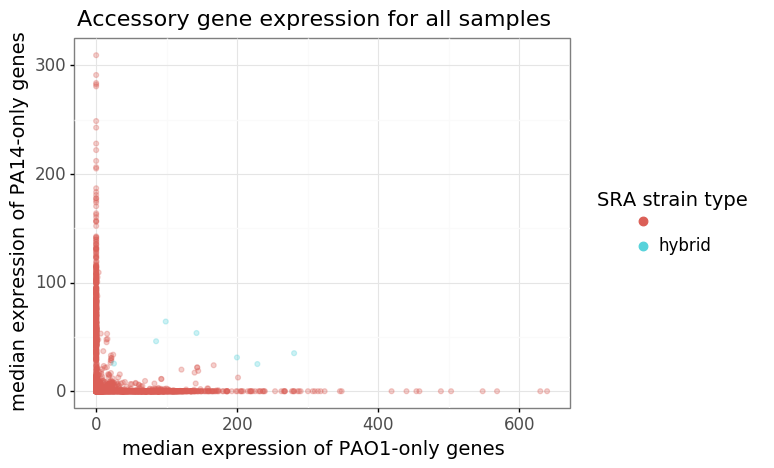

<ggplot: (8784843585409)>


In [15]:
# Confirm with plot
# Plot
fig3 = pn.ggplot(
    pao1_pa14_acc_compendium,
    pn.aes(x="median acc expression_pao1", y="median acc expression_pa14"),
)
fig3 += pn.geom_point(
    pn.aes(color="label"),
    alpha=0.3,
)
# fig3 += pn.scale_color_manual(values=colors)
fig3 += pn.labs(
    x="median expression of PAO1-only genes",
    y="median expression of PA14-only genes",
    title="Accessory gene expression for all samples",
    width=10,
)
fig3 += pn.theme_bw()
fig3 += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=14),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=16),
    axis_text=pn.element_text(family="sans-serif", size=12),
    axis_title=pn.element_text(family="sans-serif", size=14),
)
fig3 += pn.guides(
    colour=pn.guide_legend(
        title="SRA strain type", override_aes={"alpha": 1, "size": 3}
    )
)

print(fig3)

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


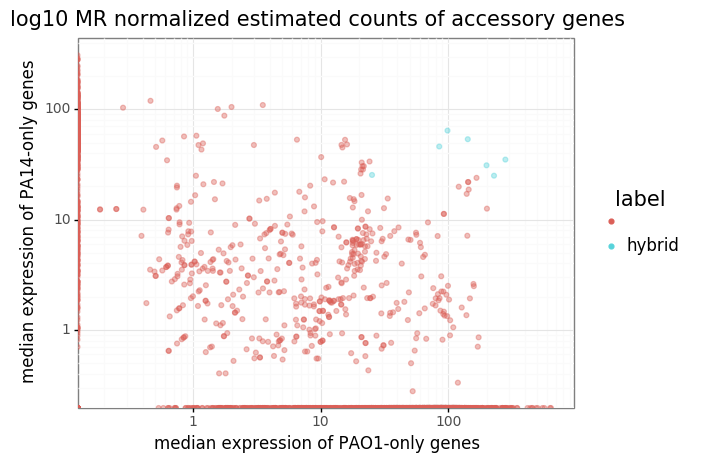

<ggplot: (8784845433353)>


In [16]:
# Plot log-scaled
fig4 = pn.ggplot(
    pao1_pa14_acc_compendium,
    pn.aes(x="median acc expression_pao1", y="median acc expression_pa14"),
)
fig4 += pn.scales.scale_x_log10()
fig4 += pn.scales.scale_y_log10()
fig4 += pn.geom_point(pn.aes(color="label"), alpha=0.4)
# fig4 += pn.scale_color_manual(values=colors)
fig4 += pn.labs(
    x="median expression of PAO1-only genes",
    y="median expression of PA14-only genes",
    title="log10 MR normalized estimated counts of accessory genes",
)
fig4 += pn.theme_bw()
fig4 += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=15),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=15),
    axis_text=pn.element_text(family="sans-serif", size=10),
    axis_title=pn.element_text(family="sans-serif", size=12),
)
fig4 += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))


print(fig4)

In [19]:
hybrid_samples_df.head(10)

,PA3159,PA4102,PA2232,PA2727,PA2104,PA1834,PA1388,PA1935,PA2372,PA3067,...,PA14_30690,PA14_13880,PA14_35740,PA14_34610,PA14_08110,PA14_51540,PA14_30890,PA14_23310,PA14_22510,median acc expression_pa14
SRX5123640,3193.061570,197.277743,228.402770,466.875402,790.026415,126.330991,0.000000,0.0,0.000000,258.612355,...,0.000000,181.876967,461.939443,38.806654,22.442402,120.627911,0.000000,790.159574,0.000000,25.013927
SRX6437625,2155.315314,196.850189,290.742550,819.777434,890.682354,237.644801,0.323767,0.0,0.000000,441.294092,...,1.320817,189.207036,4391.056123,38.303693,49.860842,122.835981,0.000000,1376.291316,0.000000,35.001651
SRX6437634,0.000000,29.123863,802.847813,377.639419,217.458174,247.552832,12.620340,0.0,0.000000,27.182272,...,42.010112,0.000000,89.882099,6.838855,8.792814,58.618760,0.976979,1386.333685,1.953959,25.401463
SRX6437734,0.000000,246.912663,275.467188,730.659920,1654.482807,263.709442,1163.176999,0.0,2.519517,0.839839,...,3474.035028,0.000000,13.590357,62.855401,20.385536,16.987946,0.000000,1105.065910,99.379486,64.129497
SRX6437777,5211.461025,129.232028,417.311758,453.209543,1530.143111,154.360478,0.897445,0.0,0.897445,572.569680,...,7.310382,187.328547,657.020613,31.069125,28.327732,274.139338,0.000000,1017.056943,0.000000,31.069125
SRX6437785,0.000000,179.354426,284.518065,632.422433,0.720299,234.097142,571.917325,0.0,0.000000,293.881951,...,0.730000,0.000000,0.730000,29.930011,13.140005,2.190001,3.650001,1257.060458,0.000000,45.990017
SRX6911057,0.000000,427.505479,454.648684,1119.317916,0.000000,316.218338,419.701807,0.0,178.805863,0.000000,...,0.000000,0.000000,2234.904946,47.915267,20.535114,0.000000,0.000000,1006.905108,0.000000,53.562423


Who are these samples?
* [SRX6437734](https://www.ncbi.nlm.nih.gov/sra/?term=SRX6437734) and SRX6437785: From an expteriment comparing transcriptional patterns in biofilm vs planktonic growth. This sample is a biofilm sample.
* [SRX6911057](https://www.ncbi.nlm.nih.gov/sra/?term=SRX6911057) a clinical isolate.

There are not too many that had a high expression in both but 2 are from the same experiment studying biofilm growth and the 1 is a clinical isolate.

In [18]:
hybrid_samples_df.to_csv("Pa_hybrid_samples.tsv", sep="\t")